# MUT Power Up players and their eligible teams (scraped from FootballDB)
#### - Matt , last updated: Oct 14, 2018<br>



In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/Users/mattjohnson/Desktop/Python2018/MUT/MUT19-PowerUp-Team-Analysis/notebooks/data_dummies_oct14.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)

In [2]:
data['LAR'].iloc[[109, 126]] = 1
data['LA'].iloc[[109, 126, 45, 84]] = 0

In [3]:
data.drop('LA', axis=1, inplace=True)
data.to_csv('data_o14.csv')

In [4]:
def insert_player(name, pos, pos2, teams, data):
    data = data.append({'Name': name, 'POS':pos, 'POS2':pos2}, ignore_index=True).fillna(0)
    
    for team in teams:
        data.set_value(len(data)-1, team, 1)
        
    return data

In [5]:
data.tail()

,Name,Pos,Teams,Ari,Atl,Bal,Buf,Car,Chi,Cin,...,NYG,NYJ,Oak,Phi,Pit,SF,Sea,TB,Ten,Was
188,Telvin Smith,LB,Jax,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
189,Tyron Smith,OT,Dal,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
190,Golden Tate III,WR,Sea|Det,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
191,Earl Thomas III,DB,Sea,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
192,Trent Williams,OT,Was,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
data['numTeams'] = data.sum(axis=1)
data.head()

,Name,Pos,Teams,Ari,Atl,Bal,Buf,Car,Chi,Cin,...,NYJ,Oak,Phi,Pit,SF,Sea,TB,Ten,Was,numTeams
0,Champ Bailey,DB,Was|Den,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
1,Randy Moss,WR,Min|Oak|NE|Min|Ten|SF,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,5
2,Michael Vick,QB,Atl|Phi|NYJ|Pit,0,1,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,4
3,Reggie White,DE,Phi|GB|Car,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,3
4,Derrick Brooks,LB,TB,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [7]:
aa = list(data['Name'].values)
bb = set(aa)
print(len(aa), len(bb))

193 185


In [8]:
data=data.drop_duplicates('Name')

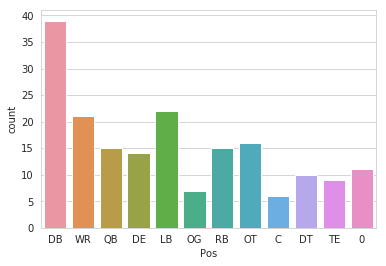

In [49]:
sns.countplot(data['Pos']);

In [9]:
# Number of teams per power up player
data['numTeams'].value_counts().sort_values(ascending=False)

1    124
2     40
3     13
5      4
4      3
7      1
Name: numTeams, dtype: int64

In [10]:
numeric_data = data.select_dtypes(include=[int])
a = numeric_data.sum().sort_values(ascending=False)[1:]

pal = {'Phi':'xkcd:green', 'NE': 'darkblue', 'NO':'gold', 'GB':'green',
       'Min':'xkcd:purple', 'Was':'maroon', 'Ten': 'cyan', 'TB':'xkcd:crimson',
       'Sea':'chartreuse', 'LAC':'xkcd:azure', 'Atl':'xkcd:red',
       'Bal':'indigo', 'LAR':'xkcd:khaki', 'KC':'red', 'NYJ': 'darkgreen',
       'Jax':'xkcd:darkgreen', 'Oak':'grey', 'Buf':'xkcd:blue', 'Car':'aqua',
       'Cle':'chocolate', 'Pit':'yellow', 'NYG':'blue', 'SF':'xkcd:gold',
       'Chi':'xkcd:orange', 'Dal':'xkcd:darkblue', 'Mia':'xkcd:aqua',
       'Den':'xkcd:orangered', 'Hou':'xkcd:navy', 'Ari':'xkcd:red',
       'Cin':'xkcd:orange', 'Det':'xkcd:lightblue', 'Ind':'xkcd:azure'}

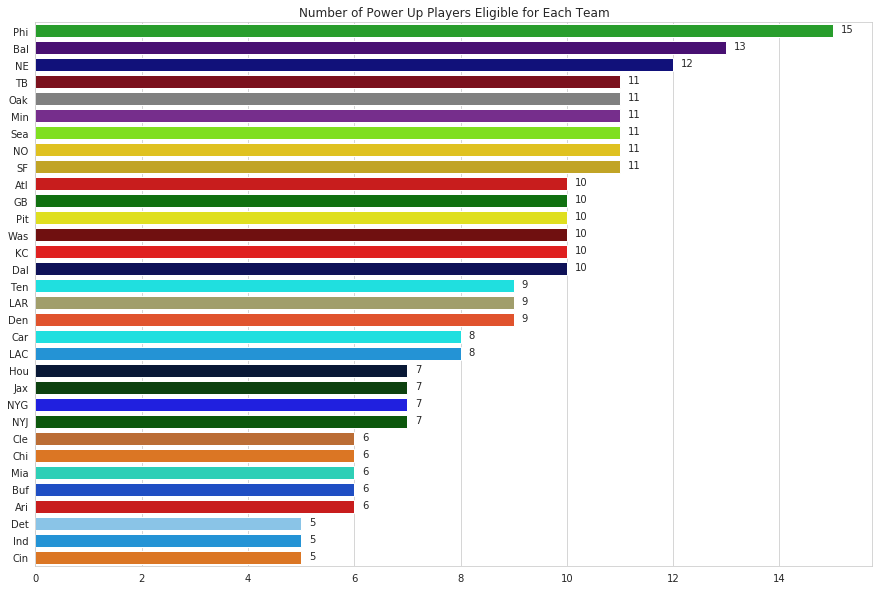

In [11]:
sns.set_style("whitegrid")

plt.figure(figsize=(15, 10))
ax = sns.barplot(x=a.values, y=a.index, palette=pal)
for p in ax.patches:
    if np.isnan(p.get_width()):
        gh = 0.0
    else:
        gh = np.round(p.get_width(), 2)
                
    ax.annotate(int(gh), (np.round(gh+0.15, 3), p.get_y()+0.5))
ax.set_title('Number of Power Up Players Eligible for Each Team');

In [12]:
data.to_csv('powerup_oct14.csv')
small_data = data[['Name','Pos','Teams', 'numTeams']]
small_data.to_csv('small_powerup_data_o14.csv')

### Biggest journeymen

In [13]:
small_data['Teams'] = small_data['Teams'].str.replace(',', ', ')
small_data['Teams'] = small_data['Teams'].str.replace('NFLEHam', ' ')
small_data[ small_data['numTeams'] >= 4].sort_values('numTeams', ascending=False)

,Name,Pos,Teams,numTeams
7,Lorenzo Neal,RB,NO|NYJ|TB|Ten|Cin|LAC|Bal,7
1,Randy Moss,WR,Min|Oak|NE|Min|Ten|SF,5
102,Rashaan Melvin,DB,TB|Bal|NE|Ind|Oak,5
142,Terrell Owens,0,SF|Phi|Dal|Buf|Cin,5
158,Deion Sanders,DB,Atl|SF|Dal|Was|Bal,5
2,Michael Vick,QB,Atl|Phi|NYJ|Pit,4
144,Rod Woodson,0,Pit|SF|Bal|Oak,4
155,Kevin Greene,LB,LAR|Pit|Car|SF|Car,4


In [14]:
team_abbrevs = list(pal.keys())
team_list = []

data.reset_index(drop=True, inplace=True)
small_data.reset_index(drop=True, inplace=True)

for team in team_abbrevs:
    current_team = data[ data[team]==1]
    indices = current_team.index.values
    team_list.append(small_data.iloc[indices])

## Team Lists

![Image](http://content.sportslogos.net/logos/7/167/thumbs/960.gif)

In [15]:
i=0
team_list[i]

,Name,Pos,Teams,numTeams
2,Michael Vick,QB,Atl|Phi|NYJ|Pit,4
3,Reggie White,DE,Phi|GB|Car,3
26,Nigel Bradham,LB,Buf|Phi,2
39,Fletcher Cox,DT,Phi,1
49,Zach Ertz,TE,Phi,1
58,Brandon Graham,DE,Phi,1
66,Jordan Hicks,LB,Phi,1
78,Malcolm Jenkins,DB,NO|Phi,2
87,Jason Kelce,C,Phi,1
108,Jason Peters,OT,Buf||Phi,2


![Image](http://content.sportslogos.net/logos/7/151/thumbs/y71myf8mlwlk8lbgagh3fd5e0.gif)

In [16]:
i+=1
print(team_abbrevs[i])
team_list[i]

NE


,Name,Pos,Teams,numTeams
1,Randy Moss,WR,Min|Oak|NE|Min|Ten|SF,5
16,David Andrews,C,NE,1
27,Tom Brady,QB,NE,1
30,Malcolm Butler,DB,NE|Ten,2
43,James Develin,RB,|NE,1
47,Julian Edelman,WR,|NE,1
56,Stephon Gilmore,DB,Buf|NE,2
63,Rob Gronkowski,TE,NE,1
100,Devin McCourty,DB,NE,1
102,Rashaan Melvin,DB,TB|Bal|NE|Ind|Oak,5


![Image](http://content.sportslogos.net/logos/7/175/thumbs/907.gif)

In [17]:
i+=1
print(team_abbrevs[i])
team_list[i]

NO


,Name,Pos,Teams,numTeams
7,Lorenzo Neal,RB,NO|NYJ|TB|Ten|Cin|LAC|Bal,7
8,Willie Roaf,OT,NO|KC,2
28,Drew Brees,QB,LAC|NO,2
41,Demario Davis,LB,NYJ|Cle|NYJ|NO,3
59,Jimmy Graham,TE,NO|Sea|GB,3
78,Malcolm Jenkins,DB,NO|Phi,2
82,Cameron Jordan,DE,NO,1
86,Alvin Kamara,RB,NO,1
92,Marshon Lattimore,DB,NO,1
111,Ryan Ramczyk,OT,NO,1


![Image](http://content.sportslogos.net/logos/7/171/thumbs/dcy03myfhffbki5d7il3.gif)

In [18]:
i+=1
print(team_abbrevs[i])
team_list[i]

GB


,Name,Pos,Teams,numTeams
3,Reggie White,DE,Phi|GB|Car,3
5,Ted Hendricks,LB,Bal|GB|Oak|LAR,3
12,Davante Adams,WR,GB,1
18,David Bakhtiari,OT,GB,1
35,Kenny Clark,DT,GB,1
59,Jimmy Graham,TE,NO|Sea|GB,3
64,Casey Hayward,DB,GB|LAC|LAC,2
74,Micah Hyde,DB,GB|Buf,2
115,Aaron Rodgers,QB,GB,1
122,Josh Sitton,OT,GB|Chi|Mia,3


![Image](http://content.sportslogos.net/logos/7/172/thumbs/17227042013.gif)

In [19]:
i+=1
print(team_abbrevs[i])
team_list[i]

Min


,Name,Pos,Teams,numTeams
1,Randy Moss,WR,Min|Oak|NE|Min|Ten|SF,5
6,Steve Hutchinson,OG,Sea|Min|Ten,3
20,Anthony Barr,LB,Min,1
44,Stefon Diggs,WR,Min,1
61,Everson Griffen,DE,Min,1
83,Linval Joseph,DT,NYG|Min,2
114,Xavier Rhodes,DB,Min,1
123,Harrison Smith,DB,Min,1
127,Adam Thielen,WR,Min,1
156,Donovan McNabb,QB,Phi|Was|Min,3


![Image](http://content.sportslogos.net/logos/7/168/thumbs/im5xz2q9bjbg44xep08bf5czq.gif)

In [20]:
i+=1
print(team_abbrevs[i])
team_list[i]

Was


,Name,Pos,Teams,numTeams
0,Champ Bailey,DB,Was|Den,2
9,Bruce Smith,DE,Buf|Was,2
10,Sean Taylor,DB,Was,1
89,Ryan Kerrigan,DE,Was,1
113,Jordan Reed,TE,Was,1
118,Brandon Scherff,OT,Was,1
156,Donovan McNabb,QB,Phi|Was|Min,3
158,Deion Sanders,DB,Atl|SF|Dal|Was|Bal,5
171,Zach Brown,LB,Was,1
184,Trent Williams,OT,Was,1


![Image](http://content.sportslogos.net/logos/7/160/thumbs/1053.gif)

In [21]:
i+=1
print(team_abbrevs[i])
team_list[i]

Ten


,Name,Pos,Teams,numTeams
1,Randy Moss,WR,Min|Oak|NE|Min|Ten|SF,5
6,Steve Hutchinson,OG,Sea|Min|Ten,3
7,Lorenzo Neal,RB,NO|NYJ|TB|Ten|Cin|LAC|Bal,7
30,Malcolm Butler,DB,NE|Ten,2
31,Kevin Byard,DB,Ten,1
33,Jurrell Casey,DT,Ten,1
94,Taylor Lewan,OT,Ten,1
133,Delanie Walker,TE,SF|Ten,2
154,Eddie George,RB,Hou|Ten|Dal,3


![Image](http://content.sportslogos.net/logos/7/176/thumbs/17636702014.gif)

In [22]:
i+=1
print(team_abbrevs[i])
team_list[i]

TB


,Name,Pos,Teams,numTeams
4,Derrick Brooks,LB,TB,1
7,Lorenzo Neal,RB,NO|NYJ|TB|Ten|Cin|LAC|Bal,7
11,Steve Young,QB,TB|SF,2
40,Lavonte David,LB,TB,1
46,Demar Dotson,OT,|TB,1
50,Mike Evans,WR,TB,1
62,Brent Grimes,DB,Atl|Mia|TB|,3
101,Gerald McCoy,DT,TB,1
102,Rashaan Melvin,DB,TB|Bal|NE|Ind|Oak,5
146,Tim Brown,0,Oak|TB,2


![Image](http://content.sportslogos.net/logos/7/180/thumbs/pfiobtreaq7j0pzvadktsc6jv.gif)

In [23]:
i+=1
print(team_abbrevs[i])
team_list[i]

Sea


,Name,Pos,Teams,numTeams
6,Steve Hutchinson,OG,Sea|Min|Ten,3
19,Doug Baldwin,WR,Sea,1
34,Kam Chancellor,DB,Sea,1
59,Jimmy Graham,TE,NO|Sea|GB,3
120,Richard Sherman,DB,Sea|SF,2
132,Bobby Wagner,LB,Sea,1
137,Russell Wilson,QB,Sea,1
148,Jerry Rice,0,SF|Oak|Sea,3
163,John Randle,DE,Min|Sea,2
182,Golden Tate III,WR,Sea|Det,2


![Image](http://content.sportslogos.net/logos/7/6446/thumbs/644624152017.gif)

In [24]:
i+=1
print(team_abbrevs[i])
team_list[i]

LAC


,Name,Pos,Teams,numTeams
7,Lorenzo Neal,RB,NO|NYJ|TB|Ten|Cin|LAC|Bal,7
14,Keenan Allen,WR,LAC|LAC,1
24,Joey Bosa,DE,LAC|LAC,1
28,Drew Brees,QB,LAC|NO,2
57,Melvin Gordon,RB,LAC|LAC,1
64,Casey Hayward,DB,GB|LAC|LAC,2
65,Hunter Henry,TE,LAC|LAC,1
75,Melvin Ingram,DE,LAC|LAC,1


![Image](http://content.sportslogos.net/logos/7/173/thumbs/299.gif)

In [25]:
i+=1
print(team_abbrevs[i])
team_list[i]

Atl


,Name,Pos,Teams,numTeams
2,Michael Vick,QB,Atl|Phi|NYJ|Pit,4
54,Devonta Freeman,RB,Atl,1
62,Brent Grimes,DB,Atl|Mia|TB|,3
80,Deion Jones,LB,Atl,1
81,Julio Jones,WR,Atl,1
96,Alex Mack,C,Cle|Atl,2
117,Matt Ryan,QB,Atl,1
131,Desmond Trufant,DB,Atl,1
158,Deion Sanders,DB,Atl|SF|Dal|Was|Bal,5
162,Tony Gonzalez,TE,KC|Atl,2


![Image](http://content.sportslogos.net/logos/7/153/thumbs/318.gif)

In [26]:
i+=1
print(team_abbrevs[i])
team_list[i]

Bal


,Name,Pos,Teams,numTeams
7,Lorenzo Neal,RB,NO|NYJ|TB|Ten|Cin|LAC|Bal,7
85,Kyle Juszczyk,RB,Bal|SF,2
102,Rashaan Melvin,DB,TB|Bal|NE|Ind|Oak,5
107,Kelechi Osemele,OG,Bal|Oak,2
125,Terrell Suggs,DE,Bal,1
138,Marshal Yanda,OG,Bal,1
144,Rod Woodson,0,Pit|SF|Bal|Oak,4
147,Ray Lewis,0,Bal,1
149,Shannon Sharpe,0,Den|Bal,2
151,Ed Reed,DB,Bal|Hou|NYJ,3


![Image](http://content.sportslogos.net/logos/7/5941/thumbs/594179532017.gif)

In [27]:
i+=1
print(team_abbrevs[i])
team_list[i]

LAR


,Name,Pos,Teams,numTeams
45,Aaron Donald,DT,LAR|LA,1
77,Janoris Jenkins,DB,LAR|NYG,2
84,Lamarcus Joyner,DB,LAR|LA,1
109,Marcus Peters,DB,KC|LA,2
126,Ndamukong Suh,DT,Det|Mia|LA,3
155,Kevin Greene,LB,LAR|Pit|Car|SF|Car,4
165,Aeneas Williams,DB,Ari|Ari|LAR,2
172,Todd Gurley II,RB,LAR,1
176,Trumaine Johnson,DB,LAR|NYJ,2


![Image](http://content.sportslogos.net/logos/7/162/thumbs/857.gif)

In [28]:
i+=1
print(team_abbrevs[i])
team_list[i]

KC


,Name,Pos,Teams,numTeams
8,Willie Roaf,OT,NO|KC,2
22,Eric Berry,DB,KC,1
67,Tyreek Hill,WR,KC,1
70,Justin Houston,LB,KC,1
72,Rodney Hudson,C,KC|Oak,2
73,Kareem Hunt,RB,KC,1
88,Travis Kelce,TE,KC,1
109,Marcus Peters,DB,KC|LA,2
162,Tony Gonzalez,TE,KC|Atl,2
168,Patrick Mahomes,QB,KC,1


![Image](http://content.sportslogos.net/logos/7/152/thumbs/v7tehkwthrwefgounvi7znf5k.gif)

In [29]:
i+=1
print(team_abbrevs[i])
team_list[i]

NYJ


,Name,Pos,Teams,numTeams
2,Michael Vick,QB,Atl|Phi|NYJ|Pit,4
7,Lorenzo Neal,RB,NO|NYJ|TB|Ten|Cin|LAC|Bal,7
13,Jamal Adams,DB,NYJ,1
41,Demario Davis,LB,NYJ|Cle|NYJ|NO,3
151,Ed Reed,DB,Bal|Hou|NYJ,3
174,Damon Harrison Sr,DT,NYJ|NYG,2
176,Trumaine Johnson,DB,LAR|NYJ,2


![Image](http://content.sportslogos.net/logos/7/159/thumbs/15988562013.gif)

In [30]:
i+=1
print(team_abbrevs[i])
team_list[i]

Jax


,Name,Pos,Teams,numTeams
25,A.J. Bouye,DB,Hou|Jax,2
32,Calais Campbell,DE,Ari|Jax,2
52,Leonard Fournette,RB,Jax,1
76,Myles Jack,LB,Jax,1
105,Andrew Norwell,OG,Car|Jax,2
112,Jalen Ramsey,DB,Jax,1
180,Telvin Smith,LB,Jax,1


![Image](http://content.sportslogos.net/logos/7/163/thumbs/g9mgk6x3ge26t44cccm9oq1vl.gif)

In [31]:
i+=1
print(team_abbrevs[i])
team_list[i]

Oak


,Name,Pos,Teams,numTeams
1,Randy Moss,WR,Min|Oak|NE|Min|Ten|SF,5
5,Ted Hendricks,LB,Bal|GB|Oak|LAR,3
38,Amari Cooper,WR,Oak,1
72,Rodney Hudson,C,KC|Oak,2
97,Khalil Mack,LB,Oak,1
102,Rashaan Melvin,DB,TB|Bal|NE|Ind|Oak,5
107,Kelechi Osemele,OG,Bal|Oak,2
144,Rod Woodson,0,Pit|SF|Bal|Oak,4
146,Tim Brown,0,Oak|TB,2
148,Jerry Rice,0,SF|Oak|Sea,3


![Image](http://content.sportslogos.net/logos/7/149/thumbs/n0fd1z6xmhigb0eej3323ebwq.gif)

In [32]:
i+=1
print(team_abbrevs[i])
team_list[i]

Buf


,Name,Pos,Teams,numTeams
9,Bruce Smith,DE,Buf|Was,2
26,Nigel Bradham,LB,Buf|Phi,2
56,Stephon Gilmore,DB,Buf|NE,2
74,Micah Hyde,DB,GB|Buf,2
108,Jason Peters,OT,Buf||Phi,2
142,Terrell Owens,0,SF|Phi|Dal|Buf|Cin,5


![Image](http://content.sportslogos.net/logos/7/174/thumbs/f1wggq2k8ql88fe33jzhw641u.gif)

In [33]:
i+=1
print(team_abbrevs[i])
team_list[i]

Car


,Name,Pos,Teams,numTeams
3,Reggie White,DE,Phi|GB|Car,3
90,Luke Kuechly,LB,Car,1
104,Cam Newton,QB,Car,1
105,Andrew Norwell,OG,Car|Jax,2
106,Greg Olsen,TE,Chi|Car,2
121,Kawann Short,DT,Car,1
136,Daryl Williams,OT,Car,1
155,Kevin Greene,LB,LAR|Pit|Car|SF|Car,4


![Image](http://content.sportslogos.net/logos/7/155/thumbs/15578552015.gif)

In [34]:
i+=1
print(team_abbrevs[i])
team_list[i]

Cle


,Name,Pos,Teams,numTeams
23,Joel Bitonio,OT,Cle,1
41,Demario Davis,LB,NYJ|Cle|NYJ|NO,3
91,Jarvis Landry,WR,Mia|Cle,2
96,Alex Mack,C,Cle|Atl,2
119,Jabaal Sheard,DE,Cle|NE|Ind,3
139,Kevin Zeitler,OG,Cin|Cle,2


![Image](http://content.sportslogos.net/logos/7/156/thumbs/970.gif)

In [35]:
i+=1
print(team_abbrevs[i])
team_list[i]

Pit


,Name,Pos,Teams,numTeams
2,Michael Vick,QB,Atl|Phi|NYJ|Pit,4
21,Le'Veon Bell,RB,Pit,1
29,Antonio Brown,WR,Pit,1
42,David DeCastro,OG,Pit,1
55,Marcus Gilbert,OT,Pit,1
116,Ben Roethlisberger,QB,Pit,1
144,Rod Woodson,0,Pit|SF|Bal|Oak,4
153,Dermontti Dawson,C,Pit,1
155,Kevin Greene,LB,LAR|Pit|Car|SF|Car,4
169,Ryan Shazier,LB,Pit,1


![Image](http://content.sportslogos.net/logos/7/166/thumbs/919.gif)

In [36]:
i+=1
print(team_abbrevs[i])
team_list[i]

NYG


,Name,Pos,Teams,numTeams
37,Landon Collins,DB,NYG,1
77,Janoris Jenkins,DB,LAR|NYG,2
83,Linval Joseph,DT,NYG|Min,2
150,Michael Strahan,0,NYG,1
159,Lawrence Taylor,LB,NYG,1
170,Odell Beckham Jr,WR,NYG,1
174,Damon Harrison Sr,DT,NYJ|NYG,2


![Image](http://content.sportslogos.net/logos/7/179/thumbs/17994552009.gif)

In [37]:
i+=1
print(team_abbrevs[i])
team_list[i]

SF


,Name,Pos,Teams,numTeams
1,Randy Moss,WR,Min|Oak|NE|Min|Ten|SF,5
11,Steve Young,QB,TB|SF,2
85,Kyle Juszczyk,RB,Bal|SF,2
120,Richard Sherman,DB,Sea|SF,2
133,Delanie Walker,TE,SF|Ten,2
142,Terrell Owens,0,SF|Phi|Dal|Buf|Cin,5
144,Rod Woodson,0,Pit|SF|Bal|Oak,4
148,Jerry Rice,0,SF|Oak|Sea,3
155,Kevin Greene,LB,LAR|Pit|Car|SF|Car,4
158,Deion Sanders,DB,Atl|SF|Dal|Was|Bal,5


![Image](http://content.sportslogos.net/logos/7/169/thumbs/364.gif)

In [38]:
i+=1
print(team_abbrevs[i])
team_list[i]

Chi


,Name,Pos,Teams,numTeams
15,Adrian Amos,DB,Chi,1
71,Jordan Howard,RB,Chi,1
106,Greg Olsen,TE,Chi|Car,2
122,Josh Sitton,OT,GB|Chi|Mia,3
130,Danny Trevathan,LB,Den|Chi,2
143,Brian Urlacher,0,Chi,1


![Image](http://content.sportslogos.net/logos/7/165/thumbs/406.gif)

In [39]:
i+=1
print(team_abbrevs[i])
team_list[i]

Dal


,Name,Pos,Teams,numTeams
48,Ezekiel Elliott,RB,Dal,1
53,Travis Frederick,C,Dal,1
93,Sean Lee,LB,|Dal,1
98,Zack Martin,OT,Dal,1
142,Terrell Owens,0,SF|Phi|Dal|Buf|Cin,5
145,Demarcus Ware,0,Dal|Den,2
154,Eddie George,RB,Hou|Ten|Dal,3
158,Deion Sanders,DB,Atl|SF|Dal|Was|Bal,5
160,Larry Allen,OG,Dal|SF,2
181,Tyron Smith,OT,Dal,1


![Image](http://content.sportslogos.net/logos/7/150/thumbs/15073062018.gif)

In [40]:
i+=1
print(team_abbrevs[i])
team_list[i]

Mia


,Name,Pos,Teams,numTeams
62,Brent Grimes,DB,Atl|Mia|TB|,3
91,Jarvis Landry,WR,Mia|Cle,2
122,Josh Sitton,OT,GB|Chi|Mia,3
126,Ndamukong Suh,DT,Det|Mia|LA,3
141,Dan Marino,0,Mia,1
177,Reshad Jones,DB,Mia,1


![Image](http://content.sportslogos.net/logos/7/161/thumbs/9ebzja2zfeigaziee8y605aqp.gif)

In [41]:
i+=1
print(team_abbrevs[i])
team_list[i]

Den


,Name,Pos,Teams,numTeams
0,Champ Bailey,DB,Was|Den,2
103,Von Miller,LB,Den,1
128,Demaryius Thomas,WR,Den,1
130,Danny Trevathan,LB,Den|Chi,2
140,Terrell Davis,0,Den,1
145,Demarcus Ware,0,Dal|Den,2
149,Shannon Sharpe,0,Den|Bal,2
161,Brian Dawkins,DB,Phi|Den,2
173,Chris Harris Jr,DB,Den,1


![Image](http://content.sportslogos.net/logos/7/157/thumbs/570.gif)

In [42]:
i+=1
print(team_abbrevs[i])
team_list[i]

Hou


,Name,Pos,Teams,numTeams
25,A.J. Bouye,DB,Hou|Jax,2
36,Jadeveon Clowney,DE,Hou,1
69,DeAndre Hopkins,WR,Hou,1
99,Tyrann Mathieu,DB,Ari|Hou,2
134,J.J. Watt,DE,Hou,1
151,Ed Reed,DB,Bal|Hou|NYJ,3
154,Eddie George,RB,Hou|Ten|Dal,3


![Image](http://content.sportslogos.net/logos/7/177/thumbs/kwth8f1cfa2sch5xhjjfaof90.gif)

In [43]:
i+=1
print(team_abbrevs[i])
team_list[i]

Ari


,Name,Pos,Teams,numTeams
32,Calais Campbell,DE,Ari|Jax,2
51,Larry Fitzgerald,WR,Ari,1
79,David Johnson,RB,Ari,1
99,Tyrann Mathieu,DB,Ari|Hou,2
110,Patrick Peterson,DB,Ari,1
165,Aeneas Williams,DB,Ari|Ari|LAR,2


![Image](http://content.sportslogos.net/logos/7/154/thumbs/403.gif)

In [44]:
i+=1
print(team_abbrevs[i])
team_list[i]

Cin


,Name,Pos,Teams,numTeams
7,Lorenzo Neal,RB,NO|NYJ|TB|Ten|Cin|LAC|Bal,7
17,Geno Atkins,DT,Cin,1
60,A.J. Green,WR,Cin,1
139,Kevin Zeitler,OG,Cin|Cle,2
142,Terrell Owens,0,SF|Phi|Dal|Buf|Cin,5


![Image](http://content.sportslogos.net/logos/7/170/thumbs/17013982017.gif)

In [45]:
i+=1
print(team_abbrevs[i])
team_list[i]

Det


,Name,Pos,Teams,numTeams
124,Matthew Stafford,QB,Det,1
126,Ndamukong Suh,DT,Det|Mia|LA,3
164,Barry Sanders,RB,Det,1
178,Darius Slay Jr,DB,Det,1
182,Golden Tate III,WR,Sea|Det,2


![Image](http://content.sportslogos.net/logos/7/158/thumbs/593.gif)

In [46]:
i+=1
print(team_abbrevs[i])
team_list[i]

Ind


,Name,Pos,Teams,numTeams
5,Ted Hendricks,LB,Bal|GB|Oak|LAR,3
68,T.Y. Hilton,WR,Ind,1
95,Andrew Luck,QB,|Ind,1
102,Rashaan Melvin,DB,TB|Bal|NE|Ind|Oak,5
119,Jabaal Sheard,DE,Cle|NE|Ind,3
